In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data =  pd.read_excel('data/Data.xlsx')
data.head()

,ID,X1,X2,X3,Z1,Z2,A,B,Y
0,1001,6.44,2.0,1.00,5,16.0,738,0.0,11.0
1,1002,0.00,0.0,0.00,4,2.0,315,0.0,0.0
2,1003,18.50,3.0,2.50,108,64.0,11415,205302.1,21.0
3,1004,4.32,1.0,0.50,0,6.0,561,0.0,7.0
4,1005,0.00,0.0,7.16,890,55.0,0,0.0,0.0


In [51]:
data_without_0 = data[data['Y'] != 0]
data_without_0.shape

(30, 9)

### Data Splitting

In [52]:
X = data_without_0.drop('Y',axis=1)
X.drop('ID',axis=1,inplace=True)
y = data_without_0['Y']


#### Replacing null values with columns mean

In [53]:
X.fillna(X.mean(),inplace=True)

### Feature Scaling

In [98]:
# Scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

,X1,X2,X3,Z1,Z2,A,B,cluster_all_features,4_clusters_all_features,4_clusters_X1X2
0,-1.107300,-0.603281,-0.789465,-0.859053,-0.827104,-1.157882,-0.665381,0.654654,0.696526,-1.167748
1,0.048193,-0.377559,-0.551212,-0.527534,-0.259667,0.186894,-0.584937,0.654654,-1.293548,1.167748
2,-1.310422,-0.829004,-0.868882,-0.875146,-0.945320,-1.180175,-0.665381,0.654654,0.696526,-1.167748
3,0.880800,0.714938,1.783668,0.125849,-0.354240,1.782061,1.991174,-1.527525,-0.298511,0.389249
4,-0.123310,-0.151836,-0.630629,1.310305,0.567844,0.313223,-0.595456,0.654654,-1.293548,1.167748


In [99]:
# removing outliers using z score technique
from scipy import stats
z = np.abs(stats.zscore(X_scaled))
X_scaled = X_scaled[(z < 3).all(axis=1)]
# y = y[(z < 3).all(axis=1)]

X_scaled.shape

(28, 10)

## Clustering

c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

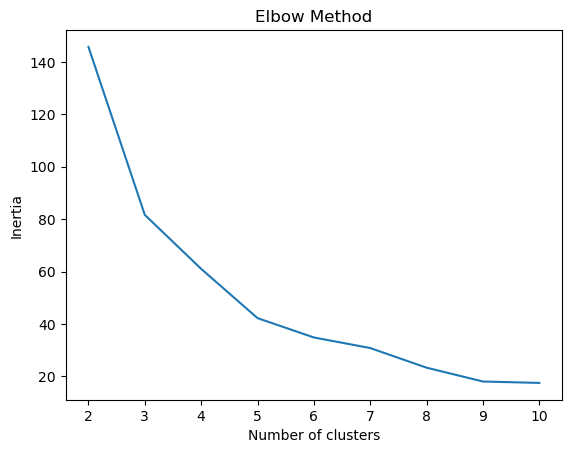

In [100]:
#setting random seed for reporducibility
np.random.seed(123)


### Elbow Method

# elbow method to determine the number of clusters
inertia = []


from sklearn.metrics import silhouette_score
silhouette = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled,kmeans.labels_))


plt.plot(range(2,11),inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.show()

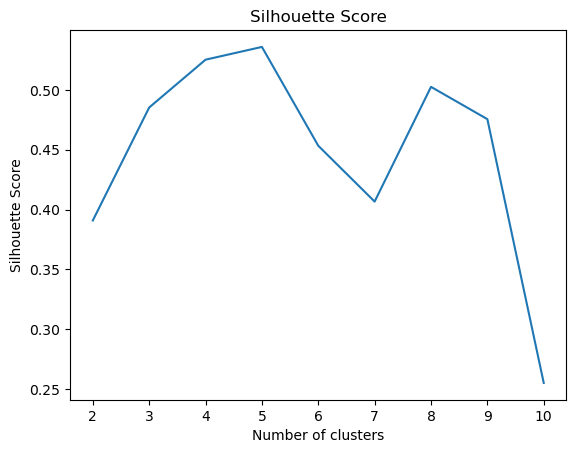

In [101]:
#po=lotting shiloutte score
plt.plot(range(2,11),silhouette)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.show()


In [103]:
# clustering the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)
X_scaled['4_clusters_all_features'] = kmeans.predict(X_scaled)

c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [105]:
X_scaled['4_clusters_all_features'].value_counts()

4_clusters_all_features
1    12
2     9
0     5
3     2
Name: count, dtype: int64

In [107]:
# clustering the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled[['X1','X2']])
X_scaled['4_clusters_X1X2'] = kmeans.predict(X_scaled[['X1','X2']])

X_scaled['4_clusters_X1X2'] .value_counts()


c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


4_clusters_X1X2
1    11
3    10
2     5
0     2
Name: count, dtype: int64

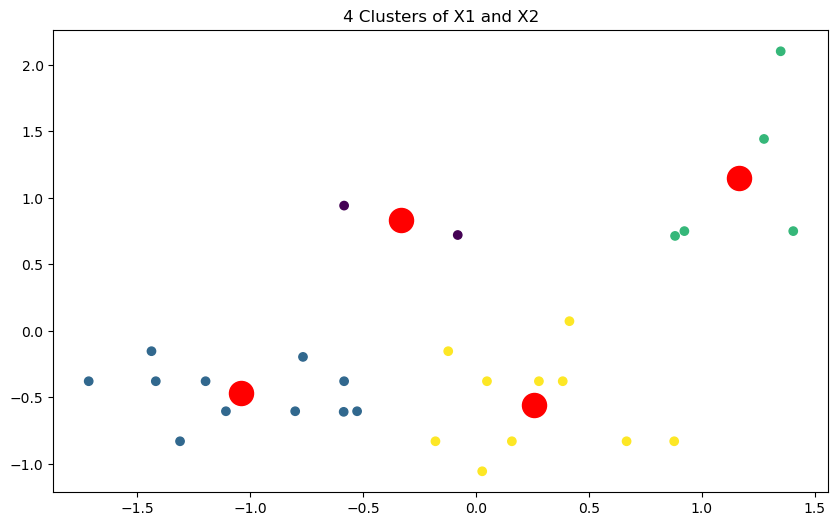

In [109]:
# plotting the clusters, along with the centroids
plt.figure(figsize=(10,6))
plt.scatter(X_scaled['X1'],X_scaled['X2'],c=X_scaled['4_clusters_X1X2'],cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red')
plt.title('4 Clusters of X1 and X2')
plt.show()

In [111]:
# DBScan Clustering
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5,min_samples=3)
X_scaled['dbscan'] = dbscan.fit_predict(X_scaled)

X_scaled['dbscan'].value_counts()


dbscan
-1    22
 0     3
 1     3
Name: count, dtype: int64

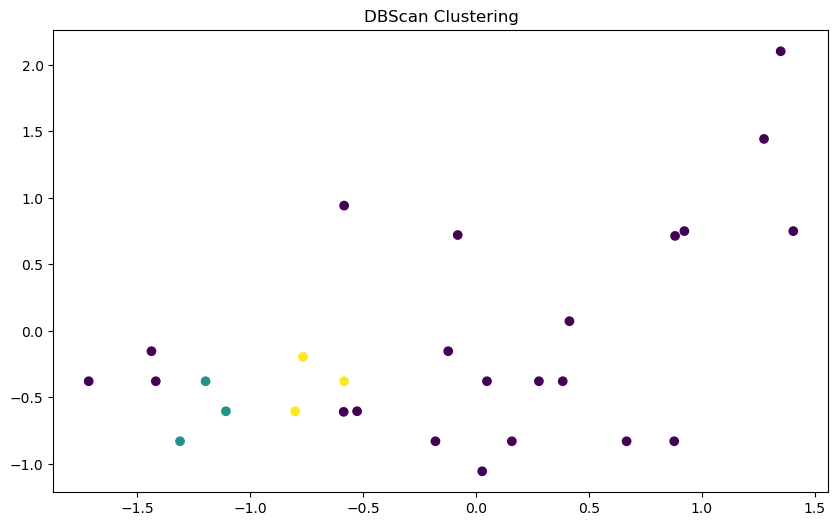

In [113]:
# poltting DBScan clusters with centroids
plt.figure(figsize=(10,6))
plt.scatter(X_scaled['X1'],X_scaled['X2'],c=X_scaled['dbscan'],cmap='viridis')
plt.title('DBScan Clustering')
plt.show()

In [120]:
#PCA to extract the first two principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

print(X_pca.shape)
pca.explained_variance_ratio_


(28, 2)


array([0.44503436, 0.20915907])

4_clusters_pca_2
1    13
3     8
2     5
0     2
Name: count, dtype: int64


c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


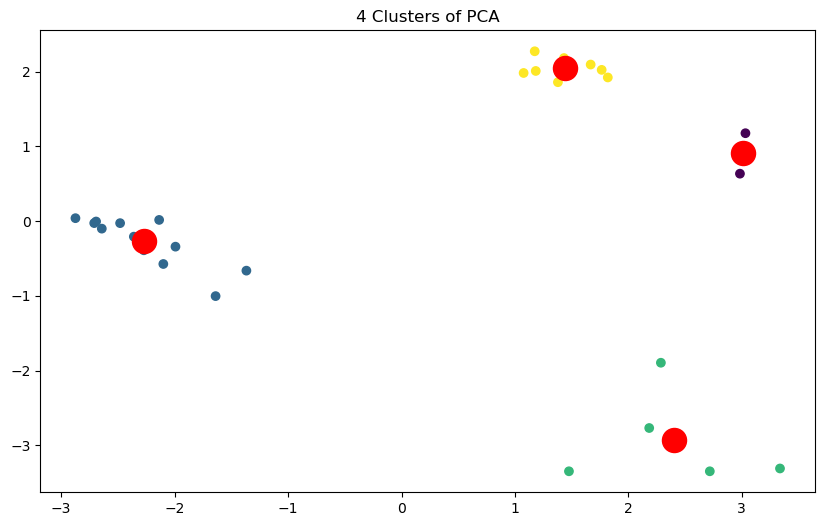

In [133]:
# perfroming clustering on the first two principal components
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_pca)
X_scaled['4_clusters_pca_2'] = kmeans.predict(X_pca)

print(X_scaled['4_clusters_pca_2'].value_counts())

# plotting the clusters, along with the centroids
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=X_scaled['4_clusters_pca_2'],cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red')
plt.title('4 Clusters of PCA')
plt.show()


c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


4_clusters_pca_3
0    13
2     8
1     5
3     2
Name: count, dtype: int64


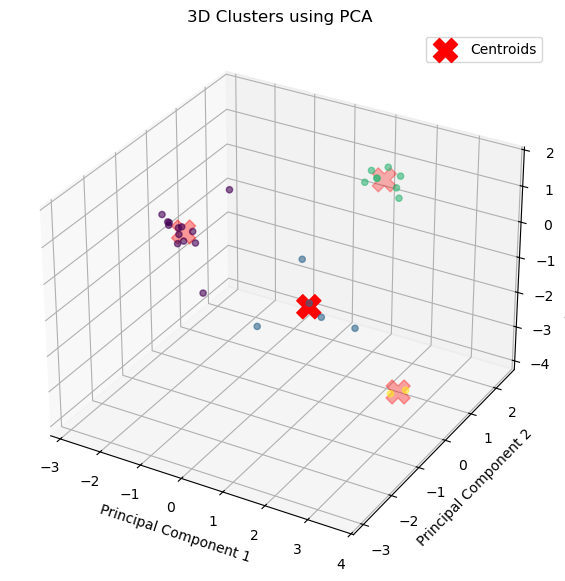

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Performing PCA to reduce to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)  # Assuming X_scaled is your standardized dataset

# Applying KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_pca)
X_scaled['4_clusters_pca_3'] = kmeans.predict(X_pca)

print(X_scaled['4_clusters_pca_3'].value_counts())

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for data points
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=X_scaled['4_clusters_pca_3'], cmap='viridis', alpha=0.6)

# Scatter plot for cluster centroids
ax.scatter(kmeans.cluster_centers_[:, 0], 
           kmeans.cluster_centers_[:, 1], 
           kmeans.cluster_centers_[:, 2], 
           s=300, c='red', marker='X', label='Centroids')

# Labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Clusters using PCA')

# Show legend
ax.legend()
plt.show()
